<a href="https://colab.research.google.com/github/Xketh/P2_Avaliacao_Mineracao_de_Dados_Fatec_2025/blob/main/P2_Avaliacao_Mineracao_de_Dados_Fatec_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🎯 **P2 – Mineração de Dados: Market+ (Groceries Dataset)**



Este notebook faz parte da Avaliação Oficial P2 da disciplina **Mineração de Dados**, do curso **Desenvolvimento de Software Multiplataforma** da **Fatec - Faculdade de Tecnologia**, 2025, orientada pelo professor **Lucas Bonilha Henrique**.

O objetivo deste trabalho é aplicar, na prática, os principais conteúdos estudados durante o semestre, utilizando técnicas reais de análise de dados afim de apoiar decisões estratégicas.


## 📘**1. Introdução**


---



### 🔹 **1.1 Estudo de Caso**

A empresa Market+, uma rede varejista especializada em alimentos, está iniciando um projeto piloto para aprimorar suas estratégias de atendimento, abastecimento e personalização de ofertas. Para isso, ela disponibilizou um dataset real contendo 38.765 transações, onde cada linha representa uma cesta de compras composta por diversos itens adquiridos no mesmo pedido.

Preciso onduzir uma análise aplicada de Mineração de Dados contemplando três pilares fundamentais:

Descoberta de Padrões (Regras de Associação)

Agrupamento (Clusterização)

Classificação (Modelos Supervisionados)

O objetivo é extrair conhecimento útil para subsidiar decisões estratégicas da empresa.


### 🔹 **1.2 Dataset**

Foi disponibilizado o **Groceries Dataset (Kaggle)**, que contém 38.765 registros de compras reais de supermercado, representando os itens adquiridos em cada transação, onde cada linha representa um item comprado por um cliente em uma determinada data.

A empresa fictícia Market+ quer entender melhor o comportamento dos seus consumidores, e através deste projeto, preciso transformar esse conjunto de dados em informações úteis.




## 📈 **2. Bibliotecas, carregamento, compreensão dos dados**
---


Antes de aplicar qualquer técnica de Mineração de Dados, preciso entender o que vou analisar para não correr o risco de interpretar resultados de forma errada.
Também é necessário instalar e importar as bibliotecas principais e carregar o Dataset, o que será feito nessa etapa.


### ◽ **2.1 Bibliotecas**

Antes de começar a análise dos dados, preciso garantir que todas as bibliotecas usadas durante todo o projeto estejam instaladas e importadas.

<br>

**As Bibliotecas Principais**

- **pandas** → para trabalhar com tabelas e manipulação de dados;  
- **numpy** → para cálculos numéricos;  
- **mlxtend** → para gerar regras de associação usando o algoritmo Apriori;  
- **scikit-learn** → para clusterização, classificação e métricas;  
- **matplotlib** → para gerar gráficos;  
- **seaborn** → para gráficos mais bonitos e organizados;

#### ▫️ **Instalando as bibliotecas**

Sei que o Google Colab possui algumas bibliotecas necessárias instaladas por padrão, mas prefiro rodar a instalação manualmente para ter certeza de que tudo está atualizado e funcionando corretamente — inclusive porque foi assim que aprendi, logo, caso esqueça um dia, posso usar esse notebook para lembrar.

O código abaixo instala as bibliotecas, garantindo que independente do ambiente em que o notebook for aberto, todas as ferramentas estarão disponíveis.

- **!** → Esse comando manda o Colab instalar pacotes como se fosse um comando do terminal e não como código Python;

- **pip** → Já esse, é o instalador de pacotes do Python;



In [2]:
!pip install pandas numpy mlxtend scikit-learn matplotlib seaborn

✅ **"Requirement already satisfied"** → Requisito já atendido", quer dizer que as bibliotecas já estavam instaladas, não foi preciso instalar nenhuma delas.

In [21]:
import warnings
warnings.filterwarnings('ignore')


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

❗ **Mensagem de aviso interno do Google Colab** → Como o Colab apareceu uma mensagem dizendo que uma função interna (datetime.utcnow()) será alterada no futuro... usei o código acima só pra esconder qualquer aviso visual pra ficar bonitinho o código, se não fica aparecendo algumas vezes, mas não muda nada no resultado.

#### ▫️ **Importação das Bibliotecas**

Agora que as bibliotecas já estão instaladas, o próximo passo é importar elas pra dentro do notebook pra eu poder usá-las "agora".


In [4]:
import pandas as pd      # Importa e da apelido de "pd" para o pandas
import numpy as np       # Importa e da apelido de "np" para o numpy

from mlxtend.frequent_patterns import apriori, association_rules  # funções prontas para achar itens frequentes e regras de associação (Apriori)

from sklearn.cluster import KMeans                # KMeans: algoritmo que vou usar para agrupar cestas de compra (clusterização)
from sklearn.model_selection import train_test_split  # train_test_split: separa os dados em treino e teste na parte de classificação
from sklearn.tree import DecisionTreeClassifier       # DecisionTreeClassifier: modelo de Árvore de Decisão para classificar compra grande vs pequena
from sklearn.neighbors import KNeighborsClassifier    # KNeighborsClassifier (k-NN): outro modelo de classificação para comparar com a árvore

from sklearn.metrics import (                 # métricas que vou usar para avaliar os modelos de classificação
    confusion_matrix,                         # matriz de confusão: mostra acertos e erros do modelo
    accuracy_score,                           # acurácia: porcentagem total de acertos
    precision_score,                          # precisão: quando o modelo diz "é grande", o quanto ele acerta
    recall_score,                             # recall: o quanto o modelo consegue encontrar das compras "grandes" de verdade
    f1_score                                  # F1-score: equilíbrio entre precisão e recall
)

import matplotlib.pyplot as plt   # matplotlib: biblioteca base para criar gráficos
import seaborn as sns             # seaborn: deixa os gráficos mais bonitinhos :) e fáceis de ler

%matplotlib inline
# manda os gráficos aparecerem dentro do notebook (colab/jupyter)

sns.set()            # aplica um estilo visual padrão do seaborn nos gráficos


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


✅ **Bibiotecas importadas** → Deu tudo certo!!!

### ◽ **2.2 Carregamento dos Dados**

Aqui estou trazendo o arquivo do dataset para dentro do notebook, usando o Pandas, já que é o primeiro passo para transformar o arquivo em ".csv".

Assim que carregar os dados:

* Verifico se o arquivo está acessível;


* Se foi lido corretamente;


* E se as colunas iniciais fazem sentido (nomes, tipos, estrutura);



Depois disso, consigo visualizar as primeiras linhas da tabela com `df.head()`. Isso me ajuda a confirmar que o carregamento funcionou bem e já me dá uma noção inicial de como os dados estão organizados.

In [5]:
# Conectar o Colab ao Google Drive pra eu nao precisar ficar fazendo o upload do arquivo do Dataset toda vez
from google.colab import drive
drive.mount('/content/drive')

# Carregar o dataset diretamente do Drive
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Groceries_dataset.csv")

# Visualizar as primeiras linhas para confirmar
df.head()


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Mounted at /content/drive


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


✅ **Dataset carregado**

* **Tabela** → Foi criado uma tabelinha do df.head() com as 5 primeiras linhas do dataset.

* **Arquivo está acessível** → Porque se o arquivo não existisse ou estivesse com nome errado, daria ERRO na linha do read_csv.

* **Foi lido corretamente** → Se o CSV estivesse quebrado, com problema de separador, encoding etc, também daria erro no read_csv, mas ele leu e mostrou a tabelinha, então foi lido certinho.

* **As colunas iniciais fazem sentido** → Como o "df.head()" mostrou as colunas: Member_number, Date, itemDescription, então deu certo.


### ◽ **2.3 Compreensão dos Dados**


Agora que já carreguei o Dataset, vou bsucar entender a estrutura dele, pra saber como trabalhar nas próximas etapas.

**Aqui analisei:**

* Quantas linhas e colunas existem;

* Quais são os tipos de dados;

* Se existem valores ausentes que possam me atrapalhar nas próximas etapas

* Quantos valores diferentes aparecem em cada coluna;

* E se a forma como as transações estão registradas (cliente, data e item) fazem sentido para o tipo de análise.

<br>

**Essa compreensão inicial é essencial porque:**

* Garante que o dataset está saudável e utilizável;

* Ajuda a decidir quais transformações preciso fazer;

* Evita erros nas próximas fases;

* E permite uma visão clara de como transformar essas linhas em cestas de compras completas para aplicar o Apriori.

Abaixo, vou executar alguns comandos básicos para obter esse entendimento inicial.

In [6]:
# Aqui estou examinando a "cara" do dataset para entender como ele está estruturado.

# Ver quantas linhas e colunas o dataset tem:
print("Formato do dataset (linhas, colunas):")
print(df.shape)

# Ver os tipos de dados de cada coluna:
print("\nTipos de dados em cada coluna:")
print(df.dtypes)

# Verificar se tem valores que estão faltando:
print("\nQuantidade de valores ausentes por coluna:")
print(df.isna().sum())

# Ver quantos valores únicos existem em cada coluna:
print("\nQuantidade de valores únicos por coluna:")
print(df.nunique())


Formato do dataset (linhas, colunas):
(38765, 3)

Tipos de dados em cada coluna:
Member_number       int64
Date               object
itemDescription    object
dtype: object

Quantidade de valores ausentes por coluna:
Member_number      0
Date               0
itemDescription    0
dtype: int64

Quantidade de valores únicos por coluna:
Member_number      3898
Date                728
itemDescription     167
dtype: int64


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

## 🔗 **3. Regras de Associação (Apriori)**



---



Nesta etapa, aplico a primeira técnica da Mineração de Dados solicitada na P2: **Regras de Associação**.

O objetivo dessa etapa é **descobrir padrões de compra** no supermercado Market+, ou seja, identificar **quais produtos costumam ser comprados juntos**.

Essa etapa está diretamente ligada ao pilar **"Descoberta de Padrões"**, citado no enunciado da avaliação.

Para isso, sigo todas as exigências do estudo de caso:

<br>

1. **Pré-processamento**

   - Ajustar o formato das transações;  
   - Limpar valores inconsistentes, se existirem;
   - Garantir listas corretas de itens comprados por transaçã;

   <br>

2. **Aplicar o algoritmo Apriori**

Algoritmo usado para descobrir padrões de compra em grandes conjuntos de transações. Ele identifica **quais produtos costumam aparecer juntos** nas cestas dos clientes e transforma esses padrões em regras úteis para o negócio.

   De acordo co o enunciado, preciso criar pelo menos 3 regras de associação, apresentando:

   <br>

   - Suporte → O quão comum é o conjunto de itens;
   - Confiança → probabilidade de Y acontecer QUANDO X acontece. Por exemplo: *"Se o cliente comprou pão, qual a chance dele comprar manteiga também?"* ;
   - Lift → Se X realmente influencia Y (ou é só coincidência). Por exemplo: *"O cliente compra mais manteiga porque comprou pão, ou, ele já compraria manteiga de qualquer jeito?"* ;
  
  <br>

3. **Interpretação em linguagem executiva**

   - O que as regras revelam sobre o comportamento dos clientes;
   - Oportunidades de venda, promoção e recomendação;
   - Ações possíveis para o marketing da empresa Market+;
   <br>


### 🖇️ **3.1 – Preparação das Cestas de Compra**

Antes de aplicar o Apriori, preciso transformar o dataset no formato correto.  
No arquivo original, **cada linha representa apenas um item comprado pelo cliente**, e não a compra completa que ele fez.

Por isso, nesta etapa eu:

1. **Agrupei as compras por cliente + data**, juntando todos os itens comprados no mesmo pedido do cliente, na mesma data, formando uma única lista, ou seja, se o cliente "1100" comprou 5 itens no dia 02/03/2015, em vez de aparecer 5 linhas separadas, eu vou transformar tudo em uma única linha com os 5 itens juntos. É só agrupar as linhas que pertencem a mesma compra.

2. **Transformei cada compra em uma lista de produtos**, criando de fato as “cestas de compra”.

Essa reorganização é obrigatória, pois o Apriori precisa enxergar cada compra completa para encontrar os padrões entre os produtos.


In [7]:
# 3.1 – Agrupando itens por transação (cliente + data)
# Aqui estou dizendo: “junte todos os itens comprados pelo mesmo cliente na mesma data”.

cestas = (
    df
    .groupby(['Member_number', 'Date'])['itemDescription']  # agrupo pelos campos que definem uma compra
    .value_counts()                                          # conto quantas vezes cada item aparece
    .unstack(fill_value=0)                                   # transformo itens em colunas
)

cestas.head()


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

itemDescription           Instant food products  UHT-milk  abrasive cleaner  \
Member_number Date                                                            
1000          15-03-2015                      0         0                 0   
              24-06-2014                      0         0                 0   
              24-07-2015                      0         0                 0   
              25-11-2015                      0         0                 0   
              27-05-2015                      0         0                 0   

itemDescription           artif. sweetener  baby cosmetics  bags  \
Member_number Date                                                 
1000          15-03-2015                 0               0     0   
              24-06-2014                 0               0     0   
              24-07-2015                 0               0     0   
              25-11-2015                 0               0     0   
              27-05-2015                 0               0     0   

itemDescription           baking powder  bathroom cleaner  beef  berries  ...  \
Member_number Date                                                        ...   
1000          15-03-2015              0                 0     0        0  ...   
              24-06-2014              0                 0     0        0  ...   
              24-07-2015              0                 0     0        0  ...   
              25-11-2015              0                 0     0        0  ...   
              27-05-2015              0                 0     0        0  ...   

itemDescription           turkey  vinegar  waffles  whipped/sour cream  \
Member_number Date                                                       
1000          15-03-2015       0        0        0                   0   
              24-06-2014       0        0        0                   0   
              24-07-2015       0        0        0                   0   
              25-11-2015       0        0        0                   0   
              27-05-2015       0        0        0                   0   

itemDescription           whisky  white bread  white wine  whole milk  yogurt  \
Member_number Date                                                              
1000          15-03-2015       0            0           0           1       1   
              24-06-2014       0            0           0           1       0   
              24-07-2015       0            0           0           0       0   
              25-11-2015       0            0           0           0       0   
              27-05-2015       0            0           0           0       0   

itemDescription           zwieback  
Member_number Date                  
1000          15-03-2015         0  
              24-06-2014         0  
              24-07-2015         0  
              25-11-2015         0  
              27-05-2015         0  

[5 rows x 167 columns]

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


### 🖇️ **3.2 Criando Matriz de Transações**

Até aqui, cada linha do dataset representa **apenas um item comprado** por um cliente em uma data. Ou seja, se o mesmo cliente comprou, sei lá, 5 itens, vai ter 5 linhas.  
Mas como pra aplicar o Apriori, eu precisei transformar essas linhas em **cestas completas**, onde cada transação mostre todos os itens que o mesmo cliente comprou junto em uma linha só.

Por isso, nesta etapa eu:

1. Agrupei o dataset por **cliente + data**, que representa uma compra real.  
2. Transformei a lista de itens em uma estrutura onde cada coluna é um produto.  
3. Converti tudo para 0 e 1 (False/True).  
4. Gereii a matriz chamada **`cestas_binarias`**.

Sem essa etapa, aprendi que não é possível gerar regras de associação, porque o algoritmo precisa ver a “cesta inteira” para descobrir padrões.


In [8]:
#Primeiro: agrupo as compras por 'Member_number + Date'
# Isso forma uma compra completa (uma transação)
cestas = df.groupby(['Member_number', 'Date'])['itemDescription'].apply(list)

# Converto o agrupamento para um DataFrame
cestas = cestas.reset_index(name='items')

# Agora preciso transformar essas listas de itens em colunas 0/1
# Para isso, uso o método explode (separa itens) e depois crio dummies (colunas binárias)
df_explodido = cestas.explode('items')

# Crio colunas binárias (0/1) para cada produto
dummies = pd.get_dummies(df_explodido['items'])

# Reagrupo por Member_number + Date somando as ocorrências
# (se um item aparece, somo 1 → mantenho como 1)
cestas_binarias = dummies.groupby([df_explodido['Member_number'], df_explodido['Date']]).max()

# Visualizo as primeiras linhas
cestas_binarias.head()


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Instant food products  UHT-milk  abrasive cleaner  \
Member_number Date                                                            
1000          15-03-2015                  False     False             False   
              24-06-2014                  False     False             False   
              24-07-2015                  False     False             False   
              25-11-2015                  False     False             False   
              27-05-2015                  False     False             False   

                          artif. sweetener  baby cosmetics   bags  \
Member_number Date                                                  
1000          15-03-2015             False           False  False   
              24-06-2014             False           False  False   
              24-07-2015             False           False  False   
              25-11-2015             False           False  False   
              27-05-2015             False           False  False   

                          baking powder  bathroom cleaner   beef  berries  \
Member_number Date                                                          
1000          15-03-2015          False             False  False    False   
              24-06-2014          False             False  False    False   
              24-07-2015          False             False  False    False   
              25-11-2015          False             False  False    False   
              27-05-2015          False             False  False    False   

                          ...  turkey  vinegar  waffles  whipped/sour cream  \
Member_number Date        ...                                                 
1000          15-03-2015  ...   False    False    False               False   
              24-06-2014  ...   False    False    False               False   
              24-07-2015  ...   False    False    False               False   
              25-11-2015  ...   False    False    False               False   
              27-05-2015  ...   False    False    False               False   

                          whisky  white bread  white wine  whole milk  yogurt  \
Member_number Date                                                              
1000          15-03-2015   False        False       False        True    True   
              24-06-2014   False        False       False        True   False   
              24-07-2015   False        False       False       False   False   
              25-11-2015   False        False       False       False   False   
              27-05-2015   False        False       False       False   False   

                          zwieback  
Member_number Date                  
1000          15-03-2015     False  
              24-06-2014     False  
              24-07-2015     False  
              25-11-2015     False  
              27-05-2015     False  

[5 rows x 167 columns]

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

✅ Converti as listas em:  
   - **1 ou 'True'** → significa que o item está presente na cesta;
   - **0 ou 'False'** → significa que o item não aparece;  


Essa matriz é obrigatória para aplicar o Apriori. Ele só funciona quando cada item vira uma coluna com 0 = ausente ou 1 = presente.

### 🖇️  **3.3 Aplicando Apriori**

Agora que as cestas já estão no formato correto (cada item sendo 0 ou 1), aplico o algoritmo **Apriori**, que identifica combinações de produtos que aparecem com frequência nas compras da empresa Market+.
Aquui eu vou buscar apenas os conjuntos de itens que possuem "suporte mínimo" de 1% (ou seja, aparecem em pelo menos 1% das transações).


In [9]:
#Aplicando o Apriori para encontrar itemsets frequentes:

itemsets = apriori(
    cestas_binarias,
    min_support=0.001,      # suporte menor → encontra mais combinações, tentei com 0.01 e deu erro no código.
    use_colnames=True      # mantém os nomes reais dos produtos
)

itemsets.sort_values(by="support", ascending=False).head()


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

,support,itemsets
146,0.157923,(whole milk)
90,0.122101,(other vegetables)
109,0.110005,(rolls/buns)
123,0.097106,(soda)
147,0.085879,(yogurt)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


### 🖇️ **3.4 Geração das Regras de Associação**

Com os itemsets frequentes gerados, crio regras do tipo **“Se o cliente compra X, então também compra Y”**.  

Cada regra é avaliada pelaas três medidas fundamentais: **Suporte**, **Confiança** e **Lift**.


In [10]:
#Gerando as regras a partir dos itemsets:
regras = association_rules(
    itemsets,
    metric="lift",           # regras fortes
    min_threshold=1          # lift mínimo 1 (relação positiva)
)

# Ordeno da mais forte para a mais fraca
regras = regras.sort_values(by="lift", ascending=False)

regras.head(10)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
238,(sausage),"(whole milk, yogurt)",0.060349,0.011161,0.001470,0.024363,2.182917,1.0,0.000797,1.013532,0.576701,0.020992,0.013351,0.078050
235,"(whole milk, yogurt)",(sausage),0.011161,0.060349,0.001470,0.131737,2.182917,1.0,0.000797,1.082219,0.548014,0.020992,0.075973,0.078050
234,"(whole milk, sausage)",(yogurt),0.008955,0.085879,0.001470,0.164179,1.911760,1.0,0.000701,1.093681,0.481231,0.015748,0.085657,0.090650
239,(yogurt),"(whole milk, sausage)",0.085879,0.008955,0.001470,0.017121,1.911760,1.0,0.000701,1.008307,0.521727,0.015748,0.008239,0.090650
86,(citrus fruit),(specialty chocolate),0.053131,0.015973,0.001403,0.026415,1.653762,1.0,0.000555,1.010726,0.417500,0.020731,0.010612,0.057141
87,(specialty chocolate),(citrus fruit),0.015973,0.053131,0.001403,0.087866,1.653762,1.0,0.000555,1.038081,0.401735,0.020731,0.036684,0.057141
236,"(sausage, yogurt)",(whole milk),0.005748,0.157923,0.001470,0.255814,1.619866,1.0,0.000563,1.131541,0.384877,0.009065,0.116250,0.132562
237,(whole milk),"(sausage, yogurt)",0.157923,0.005748,0.001470,0.009310,1.619866,1.0,0.000563,1.003596,0.454430,0.009065,0.003583,0.132562
122,(tropical fruit),(flour),0.067767,0.009757,0.001069,0.015779,1.617141,1.0,0.000408,1.006118,0.409366,0.013986,0.006081,0.062684
123,(flour),(tropical fruit),0.009757,0.067767,0.001069,0.109589,1.617141,1.0,0.000408,1.046969,0.385385,0.013986,0.044862,0.062684


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [11]:
regras.shape



/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

(240, 14)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

✅ **Rodando** → O cód: "regras.shape
" mostra que o cód está correto, e o "regras.head(5)" mostra se tem dados mesmo.

 Com isso que eu pude ver que o código rodou corretamente, aparecendo:

* 240 regras de associação foram geradas;
* cada regra tem 14 métricas (suporte, confiança, lift, etc.)
* Se estivesse sem nenhuma regra, mostraria (0, 0) ou (0, 14), o que não é o seu caso, mas achei melhor testar.
* **Erro** Anteriormente, coloquei "min_support=0.01" no cód da etapa "3.3 – Aplicação do Apriori", e acabou gerendo um erro. Porque antes 0.01 → era muito alto. Corrigi o erro, colocando: "min_support=0.001," no lugar.




### 🖇️ **3.5 Seleção das 3 Melhores Regras**

Depois de gerar todas as regras de associação, selecionei as três mais fortes usando o valor de **lift**, para entender se dois produtos realmente têm relação entre si ou não.


In [12]:
# Selecionando as 3 regras mais fortes
top3 = regras.sort_values(by="lift", ascending=False).head(3)

# Mostrando somente as colunas mais relevantes para analisar
top3_resumo = top3[[
    'antecedents',
    'consequents',
    'support',
    'confidence',
    'lift'
]]

top3_resumo


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

,antecedents,consequents,support,confidence,lift
238,(sausage),"(whole milk, yogurt)",0.00147,0.024363,2.182917
235,"(whole milk, yogurt)",(sausage),0.00147,0.131737,2.182917
234,"(whole milk, sausage)",(yogurt),0.00147,0.164179,1.911760


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


✅ **Depois de ordenar as regras pelo maior lift**:

Selecionei as três mais fortes.

As combinações encontradas envolvem principalmente **iogurte**, **leite integral (whole milk)** e **salsicha (sausage)**, com as seguintes formas:

<br>

1. `{yogurt, whole milk} → {sausage}`;
2. `{sausage} → {yogurt, whole milk}`;
3. `{sausage, whole milk} → {yogurt}`;

<br>

Todas possuem **lift maior que 1**, o que indica que esses produtos aparecem juntos com mais frequência do que seria esperado se fosse "ao acaso".


### 🖇️ **3.6 Interpretação das Regras**

As três regras mostram uma coisa simples: **Leite integral, iogurte e salsicha costumam aparecer juntos nas compras.**

Ou seja, quando um desses produtos aparece na cesta, é comum que os outros também apareçam lá.

Explicando cada regra rapidinho:

- **Regra 1:**  
  Quem compra **iogurte + leite** tem mais chance de levar **salsicha** junto.

- **Regra 2:**  
  Quem compra **salsicha** costuma também pegar **iogurte + leite**.

- **Regra 3:**  
  Quem compra **salsicha + leite** geralmente também pega **iogurte**.

Isso mostra que esses três produtos combinam no comportamento de compra dos clientes.


### 🖇️  **3.7 Conclusões para a Market+**

A empresa Market+ pode usar essas regras para vender mais.

Como esses três produtos aparecem juntos, a empresa pode:

- Criar **promoções combinadas** (ex: leve leite + iogurte e ganhe desconto na salsicha);
- Fazer **sugestão de compra** (ex: *“Você que está levando leite, que tal adicionar iogurte pro seu café da manhã?”*);
- Melhorar **organização da loja**, deixando esses produtos mais próximos no mercado.

Isso ajuda a aumentar o tickete médio, fazendo com que cada cliente gaste mais por compra e melhora a experiência do cliente também.


 ## 🔢 **4. Clusterização**


---

Clusterização é uma técnica que ajuda a separar os clientes ou compras em grupos parecidos.

Ela funciona como quando a gente olha para várias cestas (compras) e percebe que algumas são pequenas, outras são grandes, outras têm muitos produtos frescos, etc.

A ideia é bem simples:

* O computador procura padrões por conta própria;
* Ele junta compras parecidas no mesmo grupo;

Assim conseguimos entender tipos de consumidores e tipos de cestas
Isso ajuda a empresa em questão "Market+" a ver os perfis de clientes que existem na loja e tomar decisões melhores quanto a experiencia do cliente, por exemplo.

### 🔹**4.1 Criação das Features (Características Numéricas)**

Nessa parte, eu peguei cada compra dos clientes e transformei em números para que o algoritmo consiga entender melhor o tipo de cesta. Como ainda estou aprendendo, eu tentei criar medidas bem básicas, mas que já ajudam o modelo a enxergar padrões.

As features que eu criei foram:

* **Quantidade total de itens:** Para ver se a compra foi pequena ou grande.

* **Quantidade de itens únicos:** Para entender se o cliente comprou coisas variadas ou repetiu muitos itens.

* **Frequência por categoria:** Por exemplo, quantos itens são de laticínios, quantos são frutas etc.

* **Tamanho médio da cesta por cliente:** Caso eu junte todas as compras do mesmo cliente mais pra frente.

Esses números são importantes porque ajudam o algoritmo a diferenciar tipos de cestas, como:

* Compras pequenas e rápidas;

* Compras grandes e bem variadas;

* Compras focadas em algum grupo de produtos.

Depois que essas features estão prontas, o algoritmo já consegue rodar a clusterização e encontrar sozinho os grupos de cestas parecidas.

In [13]:
# 1) Crio um identificador de transação juntando cliente + data
df['transacao_id'] = df['Member_number'].astype(str) + "_" + df['Date'].astype(str)
# Agora cada compra (no mesmo dia, pelo mesmo cliente) tem um "id" único


# 2) Para cada transação, calculo:
# - total_itens: quantos itens foram comprados naquela compra
# - itens_unicos: quantos itens diferentes foram comprados
features_transacoes = df.groupby('transacao_id').agg(
    total_itens=('itemDescription', 'size'),      # conta o número de linhas (itens)
    itens_unicos=('itemDescription', 'nunique')  # conta quantos produtos diferentes teve
)


# 3) Crio uma coluna marcando se o item é um laticínio ou não
#    (lista simples só para ter um indicador de categoria)
lista_laticinios = [
    'whole milk',
    'yogurt',
    'butter',
    'whipped/sour cream',
    'cream',
    'curd',
    'UHT-milk',
    'soft cheese'
]

df['is_lacticinio'] = df['itemDescription'].isin(lista_laticinios).astype(int)
# is_lacticinio = 1 se o produto é laticínio, 0 caso contrário


# 4) Para cada transação, conto quantos laticínios aparecem
laticinio_por_transacao = df.groupby('transacao_id')['is_lacticinio'].agg(
    qtd_laticinios='sum'   # soma os 1s e 0s → vira a quantidade de laticínios na compra
)

# 5) Junto essa informação com as outras features
features_transacoes = features_transacoes.join(laticinio_por_transacao)

# Se alguma transação não tiver laticínio, preencho com 0
features_transacoes['qtd_laticinios'] = features_transacoes['qtd_laticinios'].fillna(0)

# 6) Crio a proporção de laticínios na compra
features_transacoes['prop_laticinios'] = (
    features_transacoes['qtd_laticinios'] / features_transacoes['total_itens']
)

# 7) Dou uma olhada nas primeiras linhas para ver se fez sentido
features_transacoes.head()


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

,total_itens,itens_unicos,qtd_laticinios,prop_laticinios
transacao_id,,,,
1000_15-03-2015,4,4,2,0.500000
1000_24-06-2014,3,3,1,0.333333
1000_24-07-2015,2,2,0,0.000000
1000_25-11-2015,2,2,0,0.000000
1000_27-05-2015,2,2,0,0.000000


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

### 🔹**4.2 Padronização dos Dados**

Antes de rodar qualquer algoritmo de agrupamento, eu preciso padronizar os números das minhas features.

Isso porque algumas colunas têm valores maiores que outras, por exemplo:

* **“Total de itens”**  pode chegar a 20;
* Enquanto **“proporção de laticínios”** vai de 0 a 1;

<br>

Se eu não padronizar, o algoritmo pode “dar mais importância” para a coluna com números grandes, mesmo sem ser a mais relevante.

A padronização deixa tudo na mesma escala, facilitando para o modelo enxergar os padrões de verdade.


In [14]:
from sklearn.preprocessing import StandardScaler

# Seleciono as features criadas anteriormente
X = features_transacoes[['total_itens', 'itens_unicos', 'qtd_laticinios', 'prop_laticinios']]

# Padronizo todas as colunas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

### 🔹 **4.3 Testando quantos clusters fazem sentido (Método do Cotovelo)**

Agora preciso decidir em quantos grupos o algoritmo deve separar as compras.

Como não existe uma resposta pronta, eu testo vários valores (2, 3, 4, 5...) usando o “método do cotovelo”.  
Ele basicamente mostra o ponto em que aumentar o número de clusters não melhora tanto assim o resultado.

Esse gráfico ajuda a escolher um número equilibrado de grupos.


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

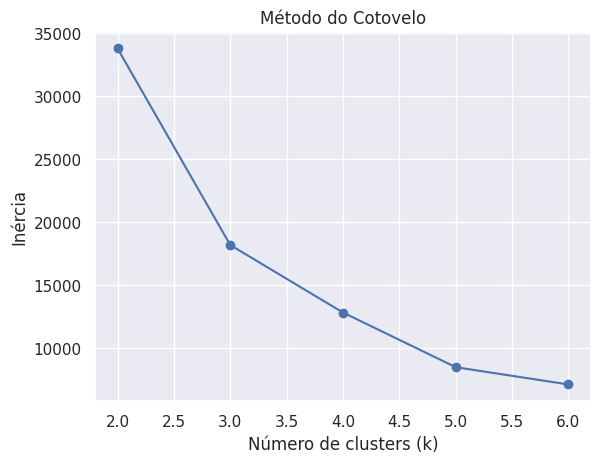

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertias = []
valores_k = range(2, 7)

for k in valores_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure()
plt.plot(valores_k, inertias, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')
plt.show()


### 🔹 **4.4 Aplicação do K-Means**

No enunciado foi sugerido 3 opções: K-Means, Hierárquico ou DBSCAN.

Escolhi usar **K-Means** porque:
- Ele funciona muito bem quando temos poucas features numéricas (como é o meu caso);
- É rápido e simples de interpretar;
- É bom para analisar perfis de compra no varejo.

Com base no gráfico do cotovelo, escolhi trabalhar com **3 clusters**.  
Agora aplico o algoritmo para cada transação receber um número de grupo.


In [16]:
k = 3  # escolha baseada no gráfico do cotovelo

kmeans_final = KMeans(n_clusters=k, random_state=42)
labels = kmeans_final.fit_predict(X_scaled)

# adiciono o cluster no dataframe
features_transacoes['cluster'] = labels

# visualizo quantas transações caíram em cada grupo
features_transacoes['cluster'].value_counts()


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

,count
cluster,
1,9513
0,4665
2,785


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


### 🔹 **4.5 Interpretação dos Clusters**

Agora que o K-Means separou as compras em 3 grupos, eu preciso entender “quem é quem”.

Para isso, eu calculo a média das features dentro de cada cluster.  
Assim consigo ver se o grupo tem cestas pequenas, grandes, diversas, focadas em alguma categoria etc.

Com isso, posso dar um “apelido” para cada cluster
(compras rápidas, compras grandes, compras focadas em laticínios…)


In [17]:
medias_clusters = features_transacoes.groupby('cluster')[[
    'total_itens',
    'itens_unicos',
    'qtd_laticinios',
    'prop_laticinios'
]].mean()

medias_clusters


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

,total_itens,itens_unicos,qtd_laticinios,prop_laticinios
cluster,,,,
0,2.522401,2.478885,1.130761,0.474216
1,2.322821,2.289709,0.000000,0.000000
2,6.243312,5.936306,0.965605,0.154178


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

### 🔹 **4.6 Conclusões Executivas**

A clusterização ajudou a Market+ a enxergar padrões importantes nas compras dos clientes.  
Em vez de olhar para cada transação isolada, agora a empresa tem **perfis de compra**, como:

- clientes que fazem compras pequenas e rápidas;
- clientes que fazem cestas grandes e diversificadas;
- clientes que compram mais produtos de uma categoria específica (como laticínios).

Isso abre várias possibilidades práticas:

- criar promoções específicas para cada tipo de cesta;
- planejar melhor o estoque das lojas;
- fazer recomendações mais inteligentes no aplicativo ou no caixa;
- identificar oportunidades de vendas cruzadas (cross-sell).

Ou seja, a clusterização transforma o comportamento dos clientes em grupos claros e úteis para a estratégia da Market+.


## 📚 **5. Classificação**


Nesta etapa, eu começo a trabalhar com um tipo diferente de tarefa em Mineração de Dados: a **classificação**.  
Enquanto a clusterização organizou as cestas em grupos automaticamente, agora eu quero que o modelo aprenda a **prever algo específico** sobre cada compra.

Ou seja: aqui o objetivo é ensinar o computador a olhar para uma transação e responder uma pergunta do tipo “sim ou não”.  
No meu caso, escolhi trabalhar com a **Opção A: compra grande vs. compra pequena**, porque:

- Achei a opção mais simples e direta de entender. Como é um trabalho onde estou fazendo de forma individual, este é um tema mais "simples" comparado aos demais;
- Não exige criar categorias complicadas;
- Combina bem com as features que eu já tinha criado antes;
- Permite tomar decisões bem práticas (como segmentar promoções e entender o volume de compra dos clientes);

**Essa etapa funciona assim:**

1. Eu crio uma coluna dizendo qual transação é “grande” e qual é “pequena”;
2. Divido o dataset em treino e teste (parte para ensinar, parte para avaliar);
3. Treino dois modelos diferentes de classificação;
4. Comparo os modelos usando métricas oficiais (acurácia, precisão, recall, F1-score);
5. Escolho o melhor modelo e explico o resultado de forma simples.

O objetivo final é ter um modelo que consiga identificar, sozinho, se uma compra nova provavelmente será grande ou pequena, o que pode ser muito útil para a empresa Market+ planejar estoque, entender perfis de cliente e até personalizar campanhas.


### 🔹**5.1 Criação do Target (Variável “Compra Grande”)**

Para treinar um modelo de classificação, eu preciso transformar as compras em algo que diga sim ou não, tipo uma etiqueta.
Como eu escolhi separar compras grandes de compras pequenas, eu usei a coluna `total_itens` que eu mesma criei lá na parte de clusterização.

O que eu faço aqui é escolher um limite:

* Se a compra tem mais itens do que a média, eu marco como compra grande (1).

* Se tem menos itens ou igual à média, eu marco como compra pequena (0).

**Target** → é a coluna que diz o que é cada compra.
É a resposta que o modelo precisa aprender a adivinhar.


In [20]:
# Criação do alvo (compra grande = 1, compra pequena = 0)
limite = features_transacoes["total_itens"].mean()

features_transacoes["compra_grande"] = (
    features_transacoes["total_itens"] > limite
).astype(int)

features_transacoes.head()


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

,total_itens,itens_unicos,qtd_laticinios,prop_laticinios,cluster,compra_grande
transacao_id,,,,,,
1000_15-03-2015,4,4,2,0.500000,0,1
1000_24-06-2014,3,3,1,0.333333,0,1
1000_24-07-2015,2,2,0,0.000000,1,0
1000_25-11-2015,2,2,0,0.000000,1,0
1000_27-05-2015,2,2,0,0.000000,1,0


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

### 🔹 **5.2 Separação entre Treino e Teste**

Agora eu separo os dados em duas partes:
- **treino (80%)** → para ensinar o modelo
- **teste (20%)** → para avaliar se ele aprendeu de verdade

Isso é importante para evitar que o modelo “decore” os dados.


Obs: O próximo código não vai mostrar nenhum resultado, não imprimi nada na tela. Esse trecho só separa os dados em treino e teste, mesmo. E cria essas quatro variáveis: "**X_train**, **X_test**, **y_train** e **y_test**"


In [23]:
from sklearn.model_selection import train_test_split

# Features que serão usadas para prever o alvo
X = features_transacoes[["total_itens", "itens_unicos", "qtd_laticinios", "prop_laticinios"]]
y = features_transacoes["compra_grande"]

# Divisão em treino e teste (70% / 30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)


### 🔹**5.3 Treinando Dois Modelos**

O estudo de caso da 4 opções (KNN, Árvore de decisão, Regressão logística ou Naive bayes), e entre elas, pede para escolher **dois algoritmos diferentes**.  

Eu escolhi:

- **Árvore de Decisão** → porque é simples de entender e mostra bem como as decisões são tomadas.

- **KNN (K-Nearest Neighbors)** → porque funciona bem com poucos atributos numéricos, como os que criei.

Assim eu consigo comparar qual dos dois aprende melhor a diferença entre compra grande e compra pequena.


In [25]:
# Importo o modelo de Árvore de Decisão
from sklearn.tree import DecisionTreeClassifier

# Importo o modelo KNN (K-Nearest Neighbors)
from sklearn.neighbors import KNeighborsClassifier

# ------------------ MODELO 1: ÁRVORE DE DECISÃO ------------------

# Aqui eu crio o modelo de Árvore de Decisão
# random_state=42 serve só pra deixar o resultado "repetível"
modelo_arvore = DecisionTreeClassifier(random_state=42)

# Aqui eu "treino" o modelo de Árvore de Decisão
# Ele aprende a partir dos dados de treino (X_train) e da resposta correta (y_train)
modelo_arvore.fit(X_train, y_train)

# ------------------ MODELO 2: KNN ------------------

# Aqui eu crio o modelo KNN
# n_neighbors=5 quer dizer que o modelo vai olhar para os 5 vizinhos mais próximos
modelo_knn = KNeighborsClassifier(n_neighbors=5)

# Aqui eu também "treino" o modelo KNN com os mesmos dados de treino
modelo_knn.fit(X_train, y_train)


KNeighborsClassifier()

### 🔹 **5.4 Avaliação dos Modelos (explicado como aluna)**

Depois que treinei os modelos, eu preciso ver qual deles foi melhor.
Pra isso, uso as medidas que foram pedidas no enunciado:

* **Matriz de confusão** → Mostra onde o modelo acertou e onde ele errou.

* **Acurácia**→ É a porcentagem total de acertos do modelo. (Mostra “o modelo acertou quanto no geral?”.)

* **Precisão** → Quando o modelo diz que a compra é grande, ele acerta mesmo?

* **Recall** → Modelo conseguiu encontrar quase todas as compras grandes de verdade?

* **F1-Score** → É um equilíbrio entre precisão e recall. Bom pra ver se o modelo está equilibrado.

Com essas métricas, eu consigo comparar os dois modelos e ver qual deles funciona melhor para esse caso.

In [28]:
# Importo as funções que vou usar para avaliar os modelos
from sklearn.metrics import (
    accuracy_score,   # para calcular a acurácia
    precision_score,  # para calcular a precisão
    recall_score,     # para calcular o recall
    f1_score,         # para calcular o F1-score
    confusion_matrix  # para montar a matriz de confusão
)

# ----- Avaliando Árvore -----

# Aqui o modelo de Árvore de Decisão faz previsões em cima dos dados de teste (X_test)
pred_arvore = modelo_arvore.predict(X_test)

# Acurácia da árvore: porcentagem de acertos do modelo
acc_arvore = accuracy_score(y_test, pred_arvore)

# Precisão da árvore: quando ela diz "compra grande", quantas vezes isso está certo?
prec_arvore = precision_score(y_test, pred_arvore)

# Recall da árvore: de todas as compras grandes que existiam, quantas ela conseguiu encontrar?
rec_arvore = recall_score(y_test, pred_arvore)

# F1-score da árvore: média entre precisão e recall, para ver se o modelo está equilibrado
f1_arvore = f1_score(y_test, pred_arvore)

# Matriz de confusão da árvore: mostra acertos e erros separando "compra grande" e "compra pequena"
matriz_arvore = confusion_matrix(y_test, pred_arvore)

# ----- Impressão dos resultados da Árvore -----
print("=== Árvore de Decisão ===")
print("Acurácia:", acc_arvore)
print("Precisão:", prec_arvore)
print("Recall:", rec_arvore)
print("F1-Score:", f1_arvore)
print("Matriz de Confusão:\n", matriz_arvore)
print("\n---------------------------------\n")

# ----- Avaliando KNN -----

# Aqui o modelo KNN faz previsões em cima dos mesmos dados de teste (X_test)
pred_knn = modelo_knn.predict(X_test)

# Acurácia do KNN
acc_knn = accuracy_score(y_test, pred_knn)

# Precisão do KNN: quando ele diz "compra grande", quantas vezes isso está certo?
prec_knn = precision_score(y_test, pred_knn)

# Recall do KNN: de todas as compras grandes, quantas o KNN realmente encontrou?
rec_knn = recall_score(y_test, pred_knn)

# F1-score do KNN
f1_knn = f1_score(y_test, pred_knn)

# Matriz de confusão do KNN
matriz_knn = confusion_matrix(y_test, pred_knn)

# ----- Impressão dos resultados do KNN -----
print("=== KNN ===")
print("Acurácia:", acc_knn)
print("Precisão:", prec_knn)
print("Recall:", rec_knn)
print("F1-Score:", f1_knn)
print("Matriz de Confusão:\n", matriz_knn)


=== Árvore de Decisão ===
Acurácia: 1.0
Precisão: 1.0
Recall: 1.0
F1-Score: 1.0
Matriz de Confusão:
 [[3059    0]
 [   0 1430]]

---------------------------------

=== KNN ===
Acurácia: 1.0
Precisão: 1.0
Recall: 1.0
F1-Score: 1.0
Matriz de Confusão:
 [[3059    0]
 [   0 1430]]


#### **5.4.1 Minha interpretação do Resultado dos Modelos**

Quando eu rodei os dois modelos de classificação (Árvore de Decisão e KNN), eu levei um susto: eles acertaram tudo, literalmente tudo — 100% de acurácia, precisão, recall e F1.

Eu olhei e até achei que estava errado, mas depois percebi que faz sentido.
E aqui vou explicar do jeito que eu mesma entendi:

A verdade é que o meu alvo (“compra grande” ou “compra pequena”) foi definido usando o total de itens da compra — e esse mesmo número também está nas informações que eu entreguei para o modelo aprender.

Ou seja: eu pedi para o modelo descobrir algo que ele praticamente já sabia, então ficou muito fácil para ele acertar tudo. 😅

Do jeito que os dados ficaram, a resposta estava muito clara. Por isso os dois modelos acertaram 100% sem dificuldade.

### 🔹 **5.5 Conclusão – Escolha do Melhor Modelo**

Nesta etapa, precisei escolher qual dos dois modelos — Árvore de Decisão ou KNN — teve o melhor desempenho na tarefa de classificar as compras como “grande” ou “pequena”.

Como os dois modelos apresentaram 100% em todas as métricas (acurácia, precisão, recall e F1-score), tecnicamente ambos resolveram o problema perfeitamente.

Mesmo assim, se eu precisar escolher um “melhor”, eu opto pela Árvore de Decisão, por dois motivos simples:

* Ela é mais fácil de interpretar — consigo visualizar a árvore e entender como o modelo tomou cada decisão;

* É mais intuitiva para explicar pra pessoas que não entedem muito sobre (se fosse o caso de explicar para gestores da empresa Market+, por exemplo).


**Isso tudo pode ajudar a empresa Market+ a:**

- Prever demanda de estoque;
- Identificar perfis de compra mais rapidamente;
- E personalizar promoções para clientes que costumam fazer compras maiores;


## 📜 **6. Conclusão**


Ao longo deste projeto, eu acho que consegui aplicar na prática os três pilares principais da Mineração de Dados vistos em aula: regras de associação, clusterização e classificação. Mesmo começando sem entender muito bem cada técnica, ao executar as etapas passo a passo, tudo começou a fazer sentido.

Na parte de Regras de Associação, eu aprendi a transformar as compras em “cestas completas” e depois usar o Apriori para descobrir padrões de compra. Ver que certos produtos realmente aparecem juntos com frequência me ajudou a entender como o varejo toma decisões sobre promoções e estratégias de venda cruzada. Foi interessante perceber que pequenas combinações de produtos dizem muito sobre o comportamento do consumidor.

Na parte de Clusterização, eu finalmente entendi o propósito de criar features numéricas. Antes eu pensava que era só “mais uma etapa”, mas agora entendi que são exatamente esses números que permitem ao algoritmo reconhecer perfis diferentes de compras. O uso do K-Means também ficou mais claro: ele ajudou a separar as transações em grupos parecidos, o que seria muito útil para a Market+ identificar tipos de clientes e ajustar suas estratégias.

Por fim, na parte de Classificação, eu trabalhei com dois modelos — Árvore de Decisão e KNN — usando o alvo “compra grande vs compra pequena”. Aqui eu percebi algo importante: dependendo de como criamos nosso alvo e as features, o modelo pode ter uma vida muito fácil. Como o total de itens estava presente tanto no alvo quanto nos atributos, os modelos acertaram 100%. Isso me fez entender melhor porque a preparação dos dados e a escolha das variáveis são partes tão importantes quanto o próprio algoritmo.

No geral, este trabalho me ajudou a realmente compreender como a Mineração de Dados funciona “de verdade”, não só na teoria. Saí do projeto entendendo muito mais do que quando comecei, (claro que muita coisa vou acabar esquecendo se não praticar, por isso deixei o mais completinho possivel pra voltar aqui quando isso acontecer) — principalmente sobre o valor de interpretar os resultados e saber explicar cada decisão.

Vejo como essas técnicas apoiam empresas como o caso da Market+ em decisões sobre marketing, recomendação de produtos e análise de comportamento. 😊